In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [2]:
df1 = pd.read_csv('bhp.csv')
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [3]:
df1.shape

(13200, 7)

In [75]:
df1.total_sqft

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13195    3453.0
13196    3600.0
13197    1141.0
13198    4689.0
13199     550.0
Name: total_sqft, Length: 13200, dtype: float64

In [4]:
df1.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [6]:
df2 = df1.drop(['location'],axis='columns')
df2.shape

(13200, 6)

In [17]:
df2['bhk'] = df2['bhk'].astype(float)

In [18]:
df2.head()

,size,total_sqft,bath,price,bhk,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


In [25]:
X = df2.drop(['price','price_per_sqft','size'],axis='columns')
X.head(3)

,total_sqft,bath,bhk
0,1056.0,2.0,2.0
1,2600.0,5.0,4.0
2,1440.0,2.0,3.0


In [26]:
X.shape

(13200, 3)

In [27]:
y = df2.price
y.head(3)

0     39.07
1    120.00
2     62.00
Name: price, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [29]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()

In [30]:
lr_clf.fit(X_train,y_train)

LinearRegression()

In [31]:
lr_clf.score(X_test,y_test)

0.4044268858902167

In [38]:
y_predict=lr_clf.predict(X_test)
y_predict

array([ 67.91284137, 130.16502767, 135.07632696, ...,  81.93844522,
        82.59028753, 140.89085371])

In [54]:
simp_train = df2.total_sqft
simp_train

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13195    3453.0
13196    3600.0
13197    1141.0
13198    4689.0
13199     550.0
Name: total_sqft, Length: 13200, dtype: float64

In [55]:
simp_test = df2.price
simp_test

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13195    231.00
13196    400.00
13197     60.00
13198    488.00
13199     17.00
Name: price, Length: 13200, dtype: float64

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(simp_train,simp_test,test_size=0.2,random_state=10)

In [100]:
X_train = x.train.value.reshape(-1, 1)
X_test = x.test.value.reshape(-1, 1)
y_train = y.train.value.reshape(-1, 1)
y_test = y.test.value.reshape(-1, 1)

NameError: name 'x' is not defined

In [98]:
from sklearn.linear_model import LinearRegression
simp = LinearRegression()
simp.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[2500. 3978. 1255. ... 2485. 1950. 1082.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [102]:
simp.score(simp_test,simp_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

ValueError: Found array with dim 3. Estimator expected <= 2.

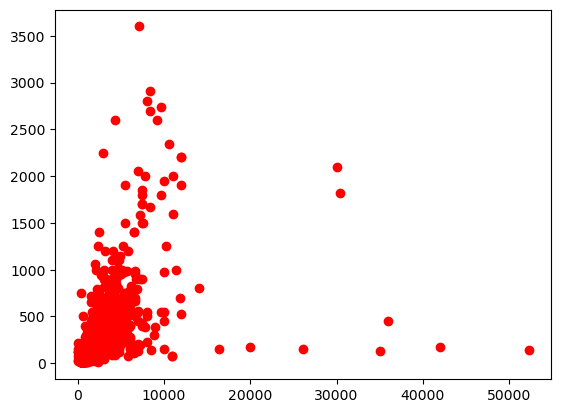

In [89]:
%matplotlib inline
plt.scatter(df2.total_sqft, df2.price, color='red')
plt.plot(simp_train, simp.predict([simp_train]), color='blue')
plt.title("graph")
plt.xlabel("x")
plt.ylabel("y")
plot.show

In [82]:
plt.plot(df1.total_sqft, simp.predict(df1[['total_sqft']]), color='blue')

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 13200 features as input.